# VGG16 Architecture Implementation

In [22]:
!nvidia-smi

Sat Aug 24 05:36:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              27W /  70W |  14091MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import cv2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from keras.models import Sequential
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPool2D, Dropout
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.optimizers import SGD


In [68]:
def VGG16(input_tensor=None, classes=2):

    model = Sequential()

    # Block1
    model.add(Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv1', input_shape=(300,300,3)))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same', name='block1_conv2'))
    model.add(MaxPool2D((2,2), strides=(2,2), name='block1_maxpool'))

    # Block2
    model.add(Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv1'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same', name='block2_conv2'))
    model.add(MaxPool2D((2,2), strides=(2,2), name='block2_maxpool'))

    # Block3
    model.add(Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv1'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv2'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same', name='block3_conv3'))
    model.add(MaxPool2D((2,2), strides=(2,2), name='block3_maxpool'))


    # Block4
    model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv1'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv2'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block4_conv3'))
    model.add(MaxPool2D((2,2), strides=(2,2), name='block4_maxpool'))


    # Block5
    model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv1'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv2'))
    model.add(Conv2D(512, (3,3), activation='relu', padding='same', name='block5_conv3'))
    model.add(MaxPool2D((2,2), strides=(2,2), name='block5_maxpool'))

    # Block6
    model.add(Flatten(name="flatten"))
    model.add(Dense(4096, activation='relu', name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu', name='fc2'))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax', name='prediction'))

    return model

In [69]:
model = VGG16(classes=2)

In [70]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 300, 300, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 300, 300, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_maxpool (MaxPooling2D)        │ (None, 150, 150, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 150, 150, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 150, 150, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_maxpool (MaxPooling2D)        │ (None, 75, 75, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 75, 75, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 75, 75, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 75, 75, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_maxpool (MaxPooling2D)        │ (None, 37, 37, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 37, 37, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 37, 37, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 37, 37, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_maxpool (MaxPooling2D)        │ (None, 18, 18, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_maxpool (MaxPooling2D)        │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     169,873,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 201,377,602 (768.19 MB)

 Trainable params: 201,377,602 (768.19 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [31]:
training_ds_path = '/content/drive/MyDrive/datasets/img-clsf/dataset/train'
testing_ds_path = '/content/drive/MyDrive/datasets/img-clsf/dataset/test'

In [32]:
cats_n_dogs = os.listdir(training_ds_path)
print(cats_n_dogs)

['dogs', 'cats']


In [33]:
arr_cats_dogs = []

for item in cats_n_dogs:
    #print(item)
    all_c_d = os.listdir(training_ds_path + "/" + item)
    #print(training_ds_path + "/" + item)

    for cat_dog in all_c_d:
        arr_cats_dogs.append((item, str(training_ds_path+ "/" + item) + '/' + cat_dog))

print(arr_cats_dogs)

[('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_293.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_140.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_305.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_342.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_186.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_212.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_267.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_295.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_290.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_178.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train/dogs/dog_253.jpg'), ('dogs', '/content/drive/MyDrive/datasets/img-clsf/dataset/train

In [34]:
cats_n_dogs_df = pd.DataFrame(data=arr_cats_dogs, columns=['cats_dogs','image'])
print(cats_n_dogs_df)

    cats_dogs                                              image
0        dogs  /content/drive/MyDrive/datasets/img-clsf/datas...
1        dogs  /content/drive/MyDrive/datasets/img-clsf/datas...
2        dogs  /content/drive/MyDrive/datasets/img-clsf/datas...
3        dogs  /content/drive/MyDrive/datasets/img-clsf/datas...
4        dogs  /content/drive/MyDrive/datasets/img-clsf/datas...
..        ...                                                ...
552      cats  /content/drive/MyDrive/datasets/img-clsf/datas...
553      cats  /content/drive/MyDrive/datasets/img-clsf/datas...
554      cats  /content/drive/MyDrive/datasets/img-clsf/datas...
555      cats  /content/drive/MyDrive/datasets/img-clsf/datas...
556      cats  /content/drive/MyDrive/datasets/img-clsf/datas...

[557 rows x 2 columns]


In [35]:
print("Total number of images: ", len(arr_cats_dogs))
cats_n_dogs_df['cats_dogs'].value_counts()

Total number of images:  557


,count
cats_dogs,
cats,279
dogs,278


In [36]:
#path = './dataset/train/'

im_size = 300

images = []
labels = []

for indx in cats_n_dogs:
    data_path = training_ds_path + "/" + str(indx)

    image_files = [image for image in os.listdir(data_path)]

    for img_file in image_files:
        img = cv2.imread(data_path + '/' + img_file)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(indx)

In [37]:
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(557, 300, 300, 3)

In [38]:
y = cats_n_dogs_df['cats_dogs'].values

le = LabelEncoder()
y = le.fit_transform(y)
print(y)
le.classes_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

array(['cats', 'dogs'], dtype=object)

In [39]:
y = y.reshape(-1,1)

ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(y)
y.shape

(557, 2)

In [40]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [41]:
model.fit(images, y, epochs=15, batch_size=32)

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5123 - loss: 0.6932
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 832ms/step - accuracy: 0.5080 - loss: 0.6931
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 841ms/step - accuracy: 0.4550 - loss: 0.6933
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 847ms/step - accuracy: 0.4962 - loss: 0.6933
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 850ms/step - accuracy: 0.5297 - loss: 0.6929
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 858ms/step - accuracy: 0.5335 - loss: 0.6927
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 862ms/step - accuracy: 0.5351 - loss: 0.6929
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 864ms/step - accuracy: 0.5359 - loss: 0.6929
Epoch 9/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 869ms/step - accuracy: 0.5088 - loss: 0.6930
Epoch 10/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 871ms/step - accuracy: 0.4953 - loss: 0.6932
Epoch 11/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 880ms/step - accuracy: 0.5200 - loss: 0.6930
Epoch 12/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 8

In [19]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow


In [58]:
def PredictImage(image_path):
  img = image.load_img(image_path, target_size=(300, 300))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  my_image = imread(image_path)
  imshow(my_image)

  values =  model.predict(x)
  print( np.argmax(values))

  return le.classes_[np.argmax(values)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1


'dogs'

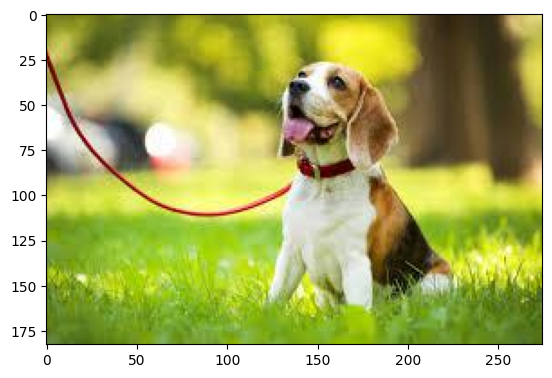

In [63]:
PredictImage('/content/drive/MyDrive/datasets/img-clsf/dataset/test/dogs/dog_354.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0


'cats'

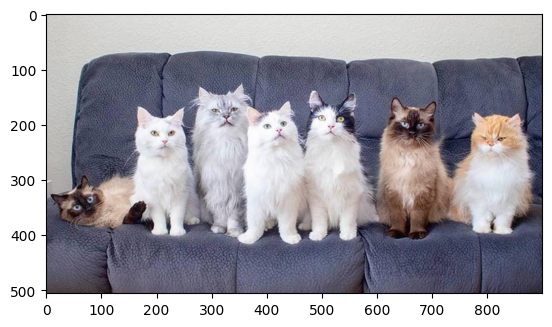

In [64]:
PredictImage('/content/drive/MyDrive/datasets/img-clsf/dataset/test/cats/cat_162.jpg')